
<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Three: Classifier training and performance assessment. </h2>	

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
%matplotlib inline

#### Util functions

In [2]:
def df_train_test_split(df, index = 0):
    '''
    Split the data into a training set, and test set 
    '''
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    length = len(df)/5
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=62)
    index1 = int(index*length)
    index2 = int((index+1)*length)
    X_train1 = X[:index1]
    X_train2 = X[index2:]
    X_test = X[index1:index2]
    X_train = X_train1.append(X_train2, ignore_index=True)
    y_train1 = y[:index1]
    y_train2 = y[index2:]
    y_test = y[index1:index2]
    y_train = y_train1.append(y_train2, ignore_index=True)
    return X_train, X_test, y_train, y_test

def accuracy(pred, actual):
    '''
    Calculate the accuracy percentage of the predicted values
    '''
    return accuracy_score(pred, actual)

def fit_predict(model):
    '''
    Fit the model and calculate the accuracy on both training and test set    
    '''
    y_predict_on_train = []
    y_predict_on_test = []
    accuracy_on_train = []
    accuracy_on_test = []
    for index in [0,1,2,3,4]:
        X_train, X_test, y_train, y_test = df_train_test_split(feature,index)
        X_train = flatten(X_train)
        X_test = flatten(X_test)
        model.fit(X_train, y_train)
        y_predict_on_train.append(model.predict(X_train))
        y_predict_on_test.append(model.predict(X_test))
        accuracy_on_train.append(accuracy(y_predict_on_train[index], y_train))
        accuracy_on_test.append(accuracy(y_predict_on_test[index], y_test))
    
#     y_predict_train.append(np.array(y_predict_on_train).mean())
#     y_predict_test.append(np.array(y_predict_on_test).mean())
    accuracy_train.append(np.array(accuracy_on_train).mean())
    accuracy_test.append(np.array(accuracy_on_test).mean())
    classifier.append(model)
    
    print(".", end="")

def flatten(X):
    '''
    flatten the elements in X which is an array    
    '''
    X = np.array(X)
    X_flatten = []
    for i in range(len(X)):
        list_ = np.append(X[i][:-2], X[i][-2]) # flatten the svd array
        list_ = np.append(list_, X[i][-1]) # flatten the canny_svd array        
        X_flatten.append(list_)
    return np.array(X_flatten)

def print_best_model(model):
    '''
    print the statistics related to the best chosen model
    '''
    max_pos = np.argmax(model.accuracy_test.values)
    print("Best hyperparameter in the model is {}".format(model.classifier[max_pos]))
    print("Train accuracy: {}".format(model.accuracy_train[max_pos]))
    print("Test accuracy: {}".format(model.accuracy_test[max_pos]))
    
def bar_plot(model, title="Logistic Regression", filename="Logistic", ymax=0.5):
    '''
    bar plot to compare different hyperparameters in a model
    '''
    try:
        os.stat("NB3_graph")
    except:
        os.mkdir("NB3_graph")  

    plt.figure(figsize=(10, 10))
    plt.bar(np.arange(len(model)) - 0.2, model.accuracy_train, width=0.4, align='center')
    plt.bar(np.arange(len(model)) + 0.2, model.accuracy_test, width=0.4, align='center')
    plt.xticks(range(len(parameters)), parameters, rotation='vertical')
    plt.tight_layout()
    plt.title(title)
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.ylim(0, ymax)
    plt.legend(["train", "validation"])
    plt.savefig("NB3_graph/"+filename+".pdf")

#### Load the data from nb2

In [3]:
feature = pd.read_hdf("feature.h5", "data")
print("feature", feature.shape)
del feature["Pictures"]
feature.head()

feature (1501, 24)


,Encoding,size,avg_red,avg_green,avg_blue,avg_gray,std_red,std_green,std_blue,std_grey,...,avg_y,avg_cb,avg_cr,std_y,std_cb,std_cr,avg_hog,std_hog,svd,canny_svd
0,0.0,0.195816,0.719042,0.693139,0.584908,0.794578,0.221203,0.251137,0.312346,0.354078,...,0.654084,0.450585,0.521069,0.209788,0.057982,0.042520,0.069350,0.086811,"[-0.9411725618842666, 0.008966214811940402, -0...","[-4.131265285862971e-06, -2.5885726321449823e-07]"
1,0.0,0.221352,0.826431,0.742275,0.646295,0.920591,0.216836,0.292104,0.276149,0.315872,...,0.712441,0.447331,0.545779,0.222930,0.024625,0.069641,0.074722,0.082233,"[-0.9452094848143205, -0.1284002312458272, -0....","[-4.131265285862971e-06, -2.5885726321449823e-07]"
2,0.0,0.194535,0.667152,0.579563,0.438250,0.696626,0.252515,0.267002,0.352605,0.448270,...,0.569144,0.426911,0.550525,0.219960,0.101463,0.074436,0.068713,0.085799,"[-0.9194251189689553, -0.04598015488281377, 0....","[-4.131265285862971e-06, -2.5885726321449823e-07]"
3,0.0,0.200430,0.596705,0.520189,0.305558,0.672473,0.253041,0.246156,0.327109,0.379313,...,0.508131,0.396350,0.550898,0.210079,0.088122,0.061079,0.074841,0.080767,"[-0.8658767978779213, 0.005307098609816353, 0....","[0.017231397222499324, -0.012404929949506977]"
4,0.0,0.208560,0.578031,0.590215,0.338247,0.624215,0.289629,0.279945,0.370162,0.447237,...,0.541838,0.393098,0.514607,0.243142,0.105869,0.027735,0.069497,0.086694,"[-0.887418659157311, 0.015802314068069624, 0.1...","[-4.131265285862971e-06, -2.5885726321449823e-07]"


In [4]:
# shuffle the data
feature = feature.sample(frac=1)
feature.head()

,Encoding,size,avg_red,avg_green,avg_blue,avg_gray,std_red,std_green,std_blue,std_grey,...,avg_y,avg_cb,avg_cr,std_y,std_cb,std_cr,avg_hog,std_hog,svd,canny_svd
1025,13.0,0.554592,0.410480,0.297470,0.222311,0.560958,0.219715,0.215602,0.211434,0.321593,...,0.339881,0.452199,0.556965,0.182864,0.027567,0.032708,0.091272,0.063365,"[-0.7370834298303202, -0.29136326638255444, -0...","[0.08180485687111783, -0.0009498508033391629]"
29,0.0,0.220473,0.547048,0.496838,0.456407,0.736538,0.366593,0.363409,0.361135,0.404482,...,0.498376,0.476761,0.526902,0.308871,0.053712,0.046490,0.062914,0.091447,"[-0.8927528332053952, 0.19386869110457242, 0.0...","[-4.131265285862971e-06, -2.5885726321449823e-07]"
131,1.0,0.137400,0.681944,0.612785,0.557543,0.807795,0.262595,0.313105,0.324413,0.374458,...,0.601370,0.467447,0.536282,0.254372,0.034486,0.042775,0.076449,0.080631,"[-0.9499039089699307, -0.006068736517266654, 0...","[-4.131265285862971e-06, -2.5885726321449823e-07]"
166,2.0,0.293664,0.649271,0.615258,0.594175,0.758423,0.240670,0.296588,0.314953,0.363055,...,0.597813,0.487659,0.518406,0.238314,0.037476,0.051397,0.065004,0.090112,"[-0.9299179662359958, -0.024287595732705846, -...","[0.007863110575450673, 0.01079281207613487]"
681,9.0,0.478500,0.535181,0.561528,0.523975,0.775065,0.346446,0.329154,0.340405,0.402171,...,0.534556,0.489372,0.493071,0.287838,0.015731,0.015659,0.078750,0.077060,"[-0.9301188835992629, 0.13802803893518037, 0.0...","[0.023358835814475117, 0.013605456674373483]"


<h3>  Train models using all of the following methods below. Be sure to drop the actual image column, and the encoding</h3>	Take note of the differences in accuracy, and methods.


### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

y_predict_train = []
y_predict_test = []
accuracy_train = []
accuracy_test = []
classifier = []
parameters = []

sns.set(font_scale=1.5)

for c in [0.1, 1, 10]:
    Logistic = LogisticRegression(random_state=42, solver='lbfgs', C=c, max_iter=5000)
    fit_predict(Logistic)
    parameters.append('C='+str(c)+',solver=lbfgs')
    Logistic = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', C=c, max_iter=5000)
    fit_predict(Logistic)
    parameters.append('C='+str(c)+',solver=lbfgs,'+'multinomial')
    Logistic = LogisticRegression(random_state=42, penalty='l1', C=c, max_iter=5000)
    fit_predict(Logistic)
    parameters.append('C='+str(c)+',penalty=l1')


/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/e

..

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


..

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/e

..

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

.

In [6]:
logistic = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
logistic.head()

,accuracy_train,accuracy_test,classifier
0,0.272319,0.263805,"LogisticRegression(C=0.1, class_weight=None, d..."
1,0.278315,0.266467,"LogisticRegression(C=0.1, class_weight=None, d..."
2,0.255162,0.247147,"LogisticRegression(C=0.1, class_weight=None, d..."
3,0.369419,0.345085,"LogisticRegression(C=1, class_weight=None, dua..."
4,0.380078,0.355739,"LogisticRegression(C=1, class_weight=None, dua..."


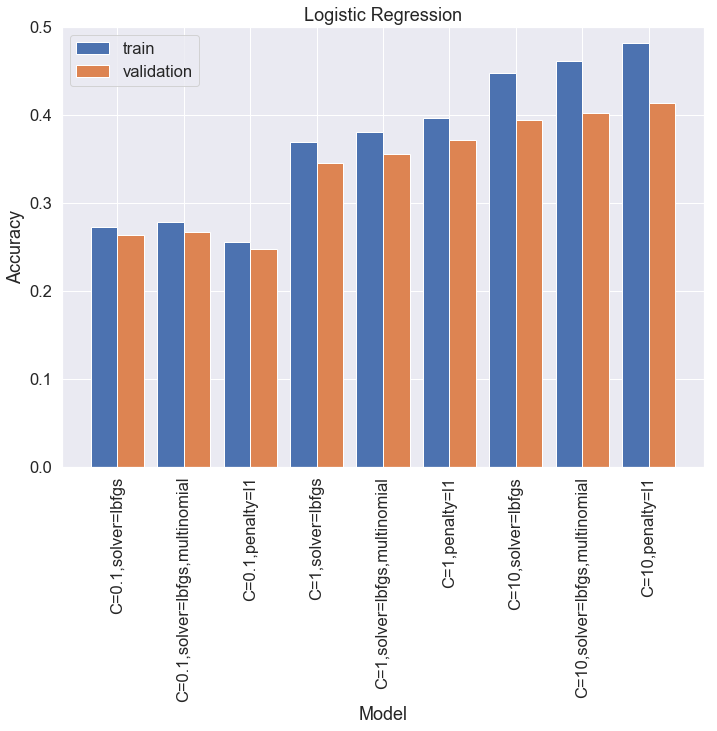

In [7]:
bar_plot(logistic, title="Logistic Regression", filename="Logistic", ymax=0.5)

In [8]:
#Print the model with best hyperparameters and its train/test accuracy
print_best_model(logistic)

Best hyperparameter in the model is LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Train accuracy: 0.48134499028587285
Test accuracy: 0.41302547065337764


### K-nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier

y_predict_train = []
y_predict_test = []
accuracy_train = []
accuracy_test = []
classifier = []
parameters = []

n_neighbors = np.arange(3, 30, 2)
for k in n_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k)
    parameters.append('n_neighbors='+str(k))
    fit_predict(KNN)

..............

In [10]:
knn = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
knn.head()

,accuracy_train,accuracy_test,classifier
0,0.595100,0.325085,"KNeighborsClassifier(algorithm='auto', leaf_si..."
1,0.534640,0.344419,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,0.500664,0.347750,"KNeighborsClassifier(algorithm='auto', leaf_si..."
3,0.476847,0.357750,"KNeighborsClassifier(algorithm='auto', leaf_si..."
4,0.466687,0.353750,"KNeighborsClassifier(algorithm='auto', leaf_si..."


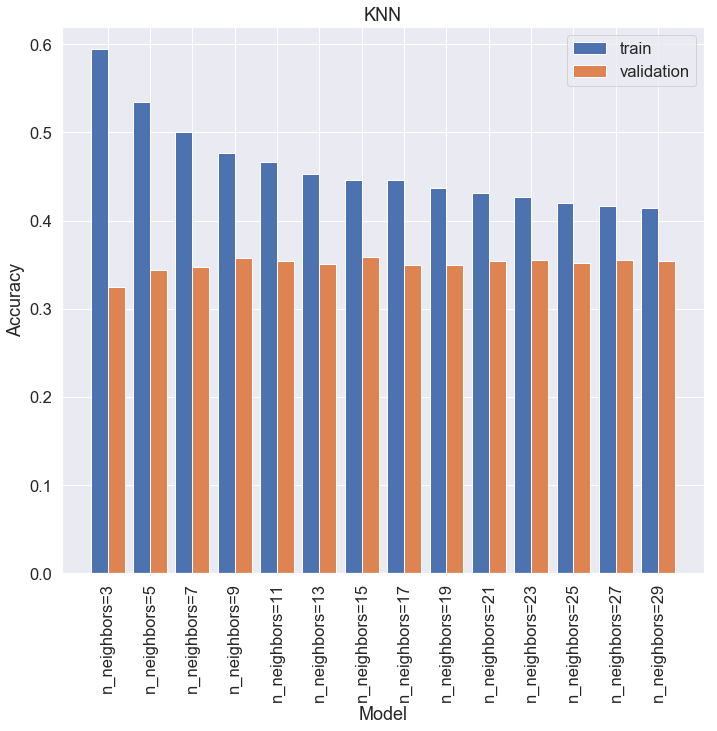

In [11]:
bar_plot(knn, title="KNN", filename="knn", ymax=0.62)

#### Print the model with best hyperparameters and its train/test accuracy

In [12]:
#Print the model with best hyperparameters and its train/test accuracy
print_best_model(knn)

Best hyperparameter in the model is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')
Train accuracy: 0.44570177629752983
Test accuracy: 0.35907641196013296


### Classification Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

y_predict_train = []
y_predict_test = []
accuracy_train = []
accuracy_test = []
classifier = []
parameters = []

for c in ['gini', 'entropy']:
    for s in ['best', 'random']:
        for min_s in np.arange(3, 5):
            parameters.append(c+','+s+','+'min_s='+str(min_s))
            DecisionTree = DecisionTreeClassifier(criterion=c, splitter = s, min_samples_split=min_s)
            fit_predict(DecisionTree)

........

In [14]:
dt = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
dt.head()

,accuracy_train,accuracy_test,classifier
0,0.933877,0.309112,"DecisionTreeClassifier(class_weight=None, crit..."
1,0.892738,0.299772,"DecisionTreeClassifier(class_weight=None, crit..."
2,0.903898,0.269130,"DecisionTreeClassifier(class_weight=None, crit..."
3,0.838108,0.267801,"DecisionTreeClassifier(class_weight=None, crit..."
4,0.945202,0.302443,"DecisionTreeClassifier(class_weight=None, crit..."


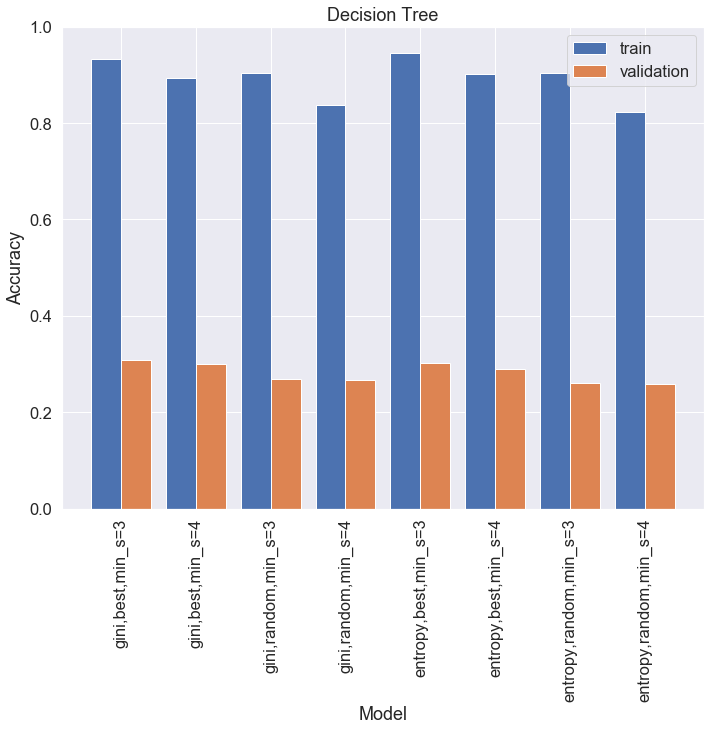

In [15]:
bar_plot(dt, title="Decision Tree", filename="dt", ymax=1)

In [16]:
#Print the model with best hyperparameters and its train/test accuracy
print_best_model(dt)

Best hyperparameter in the model is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Train accuracy: 0.9338769081321121
Test accuracy: 0.3091118493909192


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

y_predict_train = []
y_predict_test = []
accuracy_train = []
accuracy_test = []
classifier = []
parameters = []

for n in np.arange(10, 50, 20):
    for d in np.arange(2, 8):
        parameters.append('n='+str(n)+',maxdepth='+str(d))
        RandomForest = RandomForestClassifier(n_estimators=n, max_depth=d)
        fit_predict(RandomForest)

............

In [18]:
rf = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
rf.head()

,accuracy_train,accuracy_test,classifier
0,0.270318,0.261818,"(DecisionTreeClassifier(class_weight=None, cri..."
1,0.299297,0.277138,"(DecisionTreeClassifier(class_weight=None, cri..."
2,0.344765,0.298463,"(DecisionTreeClassifier(class_weight=None, cri..."
3,0.414384,0.329790,"(DecisionTreeClassifier(class_weight=None, cri..."
4,0.476349,0.327101,"(DecisionTreeClassifier(class_weight=None, cri..."


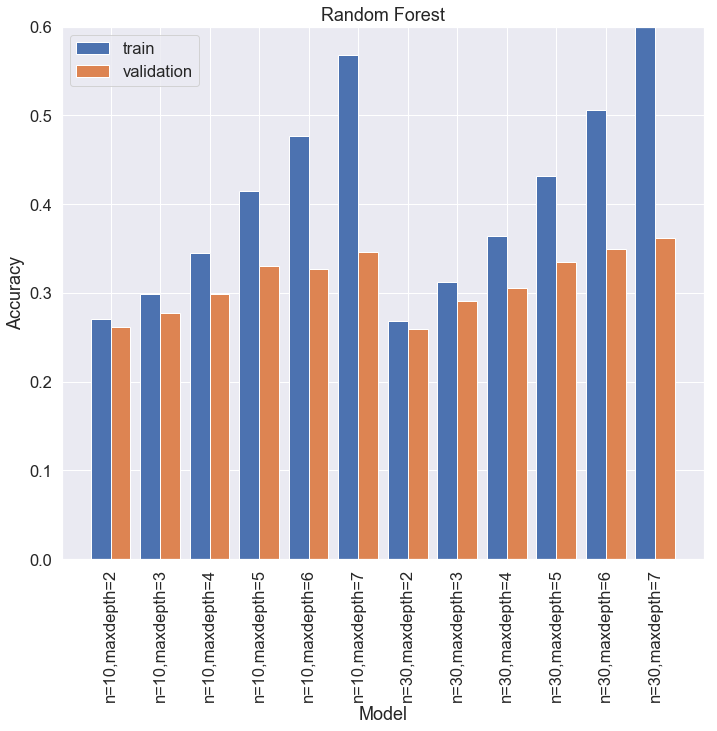

In [19]:
bar_plot(rf, title="Random Forest", filename="rf", ymax=0.6)

In [20]:
#Print the model with best hyperparameters and its train/test accuracy
print_best_model(rf)

Best hyperparameter in the model is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Train accuracy: 0.6124233971690258
Test accuracy: 0.3624008859357697


### Support Vector Machine

In [21]:
from sklearn.svm import SVC

y_predict_train = []
y_predict_test = []
accuracy_train = []
accuracy_test = []
classifier = []
parameters = []

for k in ['linear', 'rbf', 'sigmoid']:
    for c in [5, 10, 20]:
        parameters.append(k+','+'c='+str(c))
        SVM = SVC(C=c, kernel=k, random_state=42)
        fit_predict(SVM)

...

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/

.

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
svm = pd.DataFrame({
    "accuracy_train": accuracy_train,
    "accuracy_test": accuracy_test,
    "classifier": classifier})
svm.head()

,accuracy_train,accuracy_test,classifier
0,0.472017,0.393721,"SVC(C=5, cache_size=200, class_weight=None, co..."
1,0.493169,0.399037,"SVC(C=10, cache_size=200, class_weight=None, c..."
2,0.511989,0.403705,"SVC(C=20, cache_size=200, class_weight=None, c..."
3,0.347434,0.322434,"SVC(C=5, cache_size=200, class_weight=None, co..."
4,0.395735,0.354419,"SVC(C=10, cache_size=200, class_weight=None, c..."


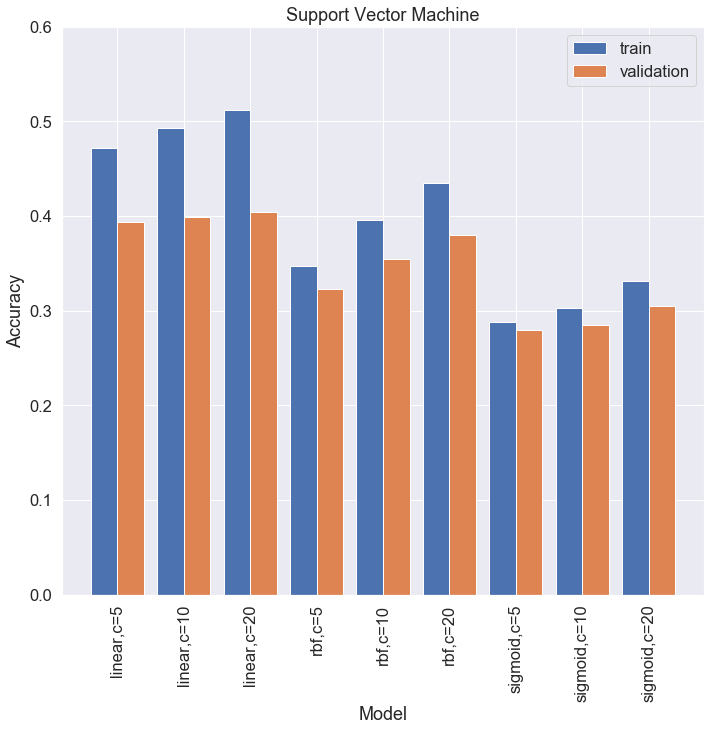

In [23]:
bar_plot(svm, title="Support Vector Machine", filename="svm", ymax=0.6)

In [24]:
#Print the model with best hyperparameters and its train/test accuracy
print_best_model(svm)

Best hyperparameter in the model is SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
Train accuracy: 0.5119894532334166
Test accuracy: 0.4037054263565891


### Apply the best model to the testset

In [25]:
# train best model
best_model = LogisticRegression(random_state=42, penalty='l1', C=10, max_iter=5000) #SVC(C=10, kernel='linear', random_state=42)
best_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
test_feature = pd.read_hdf("test_feature.h5", "data")
print("test_feature", test_feature.shape)
del test_feature["Pictures"]
test_feature.head()

In [ ]:
X_test = flatten(test_feature)
test_prediction = best_model.predict(X_test)
pd.DataFrame(test_prediction.astype(int)).to_csv("submission.csv", index=False, header=False)